# Exploratory Data Analysis
## Rancang Bangun Jaringan Saraf Tiruan untuk Sistem Kendali Lingkungan

Ridhan Fadhilah
15/384859/TK/43521

### 1. Mengimpor pustaka yang diperlukan untuk EDA

In [1]:
# Mengimpor pustaka-pustaka yang dibutuhkan
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)

### 2. Memuat data ke dalam DataFrame.

In [2]:
# Menampilkan berkas-berkas data
from subprocess import check_output
print(check_output(["ls", "../Data"]).decode("utf8"))

data1Mar.xlsx
data2Jun.xlsx
data3Sep.xlsx
data4Des.xlsx
dataAll.xlsx
dataEDA.csv
DataFormat.xlsx
Data Simulasi IESVE (1-60).xlsx
Data Simulasi IESVE (61-80).xlsx
Data Simulasi IESVE (81-100).xlsx
Data Training ANN (1-60).xlsx
Data Training ANN (61-80).xlsx
Data Training ANN (81-100).xlsx
Data Training ANN Gabung (1-100).xlsx



In [3]:
# Memasukkan dataset ke dalam jupyter.
data = pd.read_excel('../Data/data3Sep.xlsx')

In [4]:
# Menampilkan 5 data teratas
data.head()

,No,Variation,Month,Time,Heater,AC,DrybulbT,Radiation,AirT,RH
0,1,DT003,Sep,00:03:00,0,0,23.03,0.0,23.15,66.65
1,2,DT003,Sep,00:09:00,0,0,23.03,0.0,23.15,66.68
2,3,DT003,Sep,00:15:00,0,0,23.03,0.0,23.15,66.72
3,4,DT003,Sep,00:21:00,0,0,23.03,0.0,23.14,66.77
4,5,DT003,Sep,00:27:00,0,0,23.03,0.0,23.14,66.81


In [5]:
# Menampilkan 5 data terbawah
data.tail()

,No,Variation,Month,Time,Heater,AC,DrybulbT,Radiation,AirT,RH
5995,5996,DT099,Sep,23:33:00,2,0,23.28,0.0,25.26,71.38
5996,5997,DT099,Sep,23:39:00,2,0,23.28,0.0,25.22,71.52
5997,5998,DT099,Sep,23:45:00,2,0,23.28,0.0,25.18,71.66
5998,5999,DT099,Sep,23:51:00,2,0,23.28,0.0,25.14,71.81
5999,6000,DT099,Sep,23:57:00,2,0,23.28,0.0,25.11,71.94


### 3. Memeriksa tipe data

In [6]:
# Memeriksa tipe data
data.dtypes

No             int64
Variation     object
Month         object
Time          object
Heater         int64
AC             int64
DrybulbT     float64
Radiation    float64
AirT         float64
RH           float64
dtype: object

### 4. Membuang (drop) kolom yang tidak relevan

In [7]:
# Menghilangkan kolom yang tidak relevan
data = data.drop(['No'], axis=1)

### 5. Mengganti nama kolom

In [8]:
# # Mengganti nama kolom
# data = data.rename(columns={'No': 'Nomor', 'Heater': 'Pemanas'})

### 6. Membuang (drop)  baris duplikat

In [9]:
# Total number of rows and columns
data.shape

(6000, 9)

In [10]:
# Baris-baris yang mengandung data duplikat
duplicate_rows_data = data[data.duplicated()]
print('number of duplicate rows: ', duplicate_rows_data.shape)

number of duplicate rows:  (0, 9)


In [11]:
# Biasakan menghitung jumlah baris sebelumnya menghapus datanya
data.count() 

Variation    6000
Month        6000
Time         6000
Heater       6000
AC           6000
DrybulbT     6000
Radiation    6000
AirT         6000
RH           6000
dtype: int64

In [12]:
# # Membuang (drop) data duplikat 
# data = df.drop_duplicates()

### 7. Membuang (drop) nilai-nilai yang hilang atau null.

In [13]:
# Mencari nilai-nilai kosong (null)
print(data.isnull().sum())

Variation    0
Month        0
Time         0
Heater       0
AC           0
DrybulbT     0
Radiation    0
AirT         0
RH           0
dtype: int64


In [14]:
# # Membuang nilai-nilai yang hilang.
# df = df.dropna() 

### 8. Mendeteksi Outliers

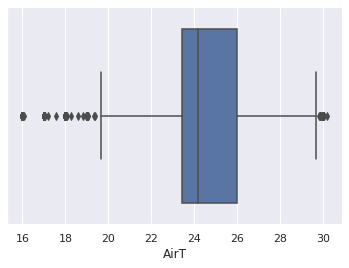

In [15]:
sns.boxplot(x=data['AirT'])

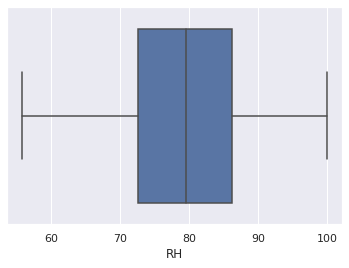

In [16]:
sns.boxplot(x=data['RH'])

In [17]:
data.describe()

,Heater,AC,DrybulbT,Radiation,AirT,RH
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.600000,9.375000,25.358083,191.983750,24.377918,79.966033
std,0.800067,12.379819,2.331456,282.013554,2.563013,9.704265
min,0.000000,0.000000,22.460000,0.000000,16.000000,55.840000
25%,0.000000,0.000000,23.217500,0.000000,23.460000,72.647500
50%,0.000000,0.000000,24.490000,0.000000,24.180000,79.495000
75%,1.000000,24.000000,27.385000,334.794500,26.000000,86.290000
max,2.000000,30.000000,29.200000,823.928000,30.190000,99.980000


In [18]:
# Menentukan nilai IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Heater         1.0000
AC            24.0000
DrybulbT       4.1675
Radiation    334.7945
AirT           2.5400
RH            13.6425
dtype: float64


In [19]:
# # Membuang Outliers
# data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
# data.shape

In [20]:
data.describe()

,Heater,AC,DrybulbT,Radiation,AirT,RH
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.600000,9.375000,25.358083,191.983750,24.377918,79.966033
std,0.800067,12.379819,2.331456,282.013554,2.563013,9.704265
min,0.000000,0.000000,22.460000,0.000000,16.000000,55.840000
25%,0.000000,0.000000,23.217500,0.000000,23.460000,72.647500
50%,0.000000,0.000000,24.490000,0.000000,24.180000,79.495000
75%,1.000000,24.000000,27.385000,334.794500,26.000000,86.290000
max,2.000000,30.000000,29.200000,823.928000,30.190000,99.980000


In [21]:
# # Membuang AC bernilai 0
# data = data[data.AC != 0]

In [22]:
data.describe()

,Heater,AC,DrybulbT,Radiation,AirT,RH
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.600000,9.375000,25.358083,191.983750,24.377918,79.966033
std,0.800067,12.379819,2.331456,282.013554,2.563013,9.704265
min,0.000000,0.000000,22.460000,0.000000,16.000000,55.840000
25%,0.000000,0.000000,23.217500,0.000000,23.460000,72.647500
50%,0.000000,0.000000,24.490000,0.000000,24.180000,79.495000
75%,1.000000,24.000000,27.385000,334.794500,26.000000,86.290000
max,2.000000,30.000000,29.200000,823.928000,30.190000,99.980000


### 9. Plot berbagai fitur terhadap satu sama lain (scatter), terhadap frekuensi (histogram)

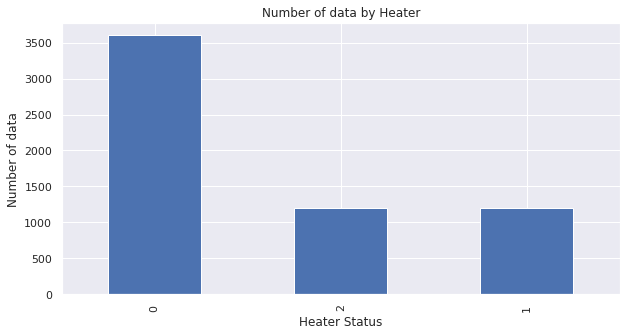

In [23]:
# Menggambar Histogram
data.Heater.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of data by Heater")
plt.ylabel('Number of data')
plt.xlabel('Heater Status');

In [24]:
# Mencari relasi anatara variabel-variabel.
c = pd.DataFrame(data.corr())
c

,Heater,AC,DrybulbT,Radiation,AirT,RH
Heater,1.000000e+00,0.068161,0.001063,-1.720985e-16,0.410788,-0.486904
AC,6.816096e-02,1.000000,0.866567,7.902211e-01,0.147143,-0.047898
DrybulbT,1.063444e-03,0.866567,1.000000,8.822591e-01,0.085127,-0.005763
Radiation,-1.720985e-16,0.790221,0.882259,1.000000e+00,0.067614,0.012059
AirT,4.107881e-01,0.147143,0.085127,6.761397e-02,1.000000,-0.819253
RH,-4.869040e-01,-0.047898,-0.005763,1.205944e-02,-0.819253,1.000000


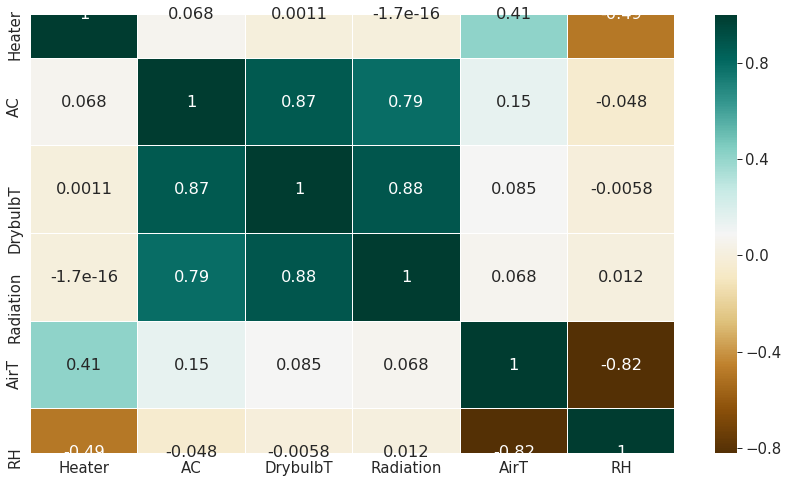

In [25]:
# Heatmaps
sns.set_style('white')
sns.set_context("paper", font_scale=1.7) 
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),cmap="BrBG",annot=True, linewidths=0.1)
plt.tight_layout()

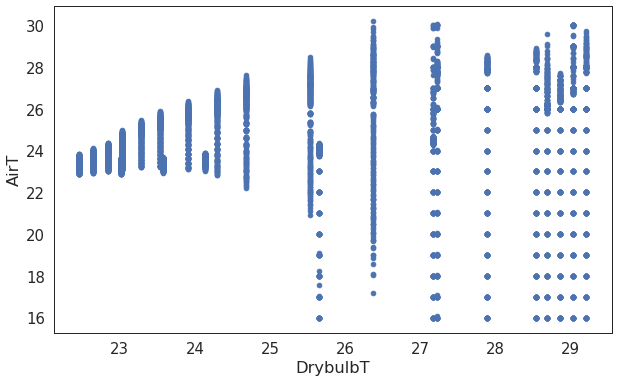

In [26]:
# Menggambar scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['DrybulbT'], data['AirT'])
ax.set_xlabel('DrybulbT')
ax.set_ylabel('AirT')
plt.show()

## Uji Distribusi dan Normalitas

count    6000.000000
mean       24.377918
std         2.563013
min        16.000000
25%        23.460000
50%        24.180000
75%        26.000000
max        30.190000
Name: AirT, dtype: float64
Kurtosis of normal distribution (should be 0): 1.6486556258205392
Skewness of normal distribution (should be 0): -0.890693056464147


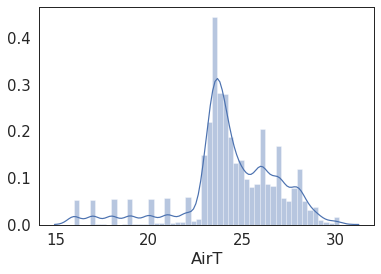

In [27]:
print(data.AirT.describe())

sns.distplot(data.AirT);

stats.normaltest(data.AirT)
#This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D'Agostino and Pearson's test that combines skew and kurtosis to produce
# an omnibus test of normality.
print( 'Kurtosis of normal distribution (should be 0): {}'.format(stats.kurtosis(data.AirT)))
print( 'Skewness of normal distribution (should be 0): {}'.format(stats.skew(data.AirT)))

KURTOSIS: menggambarkan bobot ekor suatu distribusi

Distribusi Normal memiliki kurtosis 0 (mesokurtik) <br/>
Nilai positif memberi tahu Anda bahwa Anda memiliki ekor yang berat (mis. Banyak data di ekor Anda). <br/>
Nilai negatif berarti Anda memiliki ekor ringan (mis. Sedikit data di ekor Anda). <br/>

SKEWNESS:

Jika kemiringan kurang dari -1 atau lebih besar dari 1, distribusinya sangat miring. <br/>
Jika kemiringan antara -1 dan -0,5 atau antara 0,5 dan 1, distribusinya cukup miring. <br/>
Jika kemiringan antara -0,5 dan 0,5, distribusinya kira-kira simetris. <br/>

count    6000.000000
mean       79.966033
std         9.704265
min        55.840000
25%        72.647500
50%        79.495000
75%        86.290000
max        99.980000
Name: RH, dtype: float64
Kurtosis of normal distribution (should be 0): -0.3375007881559364
Skewness of normal distribution (should be 0): 0.3010456112675289


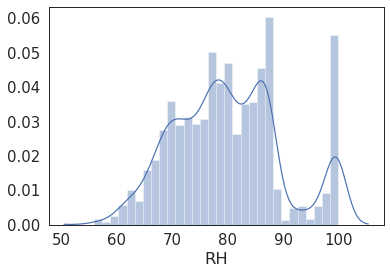

In [28]:
print(data.RH.describe())

sns.distplot(data.RH);

stats.normaltest(data.RH)
#This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D'Agostino and Pearson's test that combines skew and kurtosis to produce
# an omnibus test of normality.
print( 'Kurtosis of normal distribution (should be 0): {}'.format(stats.kurtosis(data.RH)))
print( 'Skewness of normal distribution (should be 0): {}'.format(stats.skew(data.RH)))

count    6000.000000
mean        9.375000
std        12.379819
min         0.000000
25%         0.000000
50%         0.000000
75%        24.000000
max        30.000000
Name: AC, dtype: float64
Kurtosis of normal distribution (should be 0): -1.4636009520297257
Skewness of normal distribution (should be 0): 0.6387853179108071


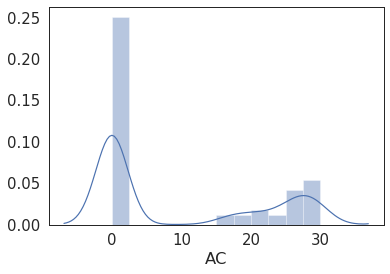

In [29]:
print(data.AC.describe())

sns.distplot(data.AC);

stats.normaltest(data.AC)
#This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D'Agostino and Pearson's test that combines skew and kurtosis to produce
# an omnibus test of normality.
print( 'Kurtosis of normal distribution (should be 0): {}'.format(stats.kurtosis(data.AC)))
print( 'Skewness of normal distribution (should be 0): {}'.format(stats.skew(data.AC)))